# Lecture 7: Rows, Columns, Images

Two dimensional data arrays are normally stored in column-major or row-major order. 

In **row-major**, order adjacent elements within a **row** are stored next to each other in memory. In **column-major**, order adjacent elements within a **column** are stored next to each other in memory. See also https://en.wikipedia.org/wiki/Matrix_representation.

For the usual mathematical matrix notation $A_{ij}$, where $i$ is the row, and $j$ the column, we have in the case of a $3x4$ matrix:

$$
A = \begin{bmatrix}
a_{11} & a_{12} & a_{13} & a_{14}\\
a_{21} & a_{22} & a_{23} & a_{24}\\
a_{31} & a_{32} & a_{33} & a_{34}\\
\end{bmatrix}
$$

or (zero-indexed):

$$
A = \begin{bmatrix}
a_{00} & a_{01} & a_{02} & a_{03}\\
a_{10} & a_{11} & a_{12} & a_{13}\\
a_{20} & a_{21} & a_{33} & a_{23}\\
\end{bmatrix}
$$

Classic languages such as Fortran store their arrays in so-called column-major order. **FDATA(NR,NC)**, and indices start at 1. 

More modern language, such a C, store their arrays in row-major order,  **CDATA[NR][NC]**, with indices starting at 0.
```
    col major:   fdata(1,1),  fdata(2,1), ...        first index runs fastest 
    row major:   cdata[0][0], cdata[0][1], ...       last index runs fastest  
```

Examples of column major are: Fortran, MatLab, IDL, R, and Julia

Examples of row major are: C and Python

Images or matrices are often referred to in X and Y coordinates, like a mathematical system. The origin would be at (0,0) in the lower left corner; however, this convention can vary from field to field. For instance, image processing software normally puts the (0,0) origin at the top left corner, which is similar to how the matrix above is printed. 

This, together with row-major and column-major can make it challenging to interchange data and plot them on the screen between fields and programming language and having to re-order axis' (especially for large data sets) can be a very expensive operation.

## 1. A Simple Example


In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

# lets import fits from astropy,
#  one of many more complex file types
#  for storing multi-dimensional data
# common data type for astronomy
# Flexible Image Transport System
# Other's include, CDF, Net CDF, HD5, matlab .m files, idl .sav files

from astropy.io import fits         

Get the Header-Data-Units (hdu's) from a fits file. This particular one only has 1.

In [2]:
# open a simple fit's file

hdu = fits.open('../data/cube432.fits')
print(len(hdu))
hdu.info()

1
Filename: ../data/cube432.fits
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      37   (4, 3, 2)   float32   


In [3]:
# access the header
h = hdu[0].header
# access the data
d = hdu[0].data

#what is the header?
print(type(h))

#what type of data?
print(type(d))
print(d.shape)
print(d)

<class 'astropy.io.fits.header.Header'>
<type 'numpy.ndarray'>
(2L, 3L, 4L)
[[[   0.    1.    2.    3.]
  [  10.   11.   12.   13.]
  [  20.   21.   22.   23.]]

 [[ 100.  101.  102.  103.]
  [ 110.  111.  112.  113.]
  [ 120.  121.  122.  123.]]]


In [4]:
f=d[1,:,:]
print(f)

f[:,1:3] #slicing does not include the last index

[[ 100.  101.  102.  103.]
 [ 110.  111.  112.  113.]
 [ 120.  121.  122.  123.]]


array([[ 101.,  102.],
       [ 111.,  112.],
       [ 121.,  122.]], dtype=float32)

This 4x3x2 matrix can actually also be generated from scratch using basic numpy:

In [5]:


d1 = np.zeros(2*3*4).reshape(2,3,4)
dimensions = d1.shape
for z in range(dimensions[0]):
    for y in range(dimensions[1]):
        for x in range(dimensions[2]):
            d1[z,y,x] = x + 10*y + 100*z
print(d1)


d1.shape

[[[   0.    1.    2.    3.]
  [  10.   11.   12.   13.]
  [  20.   21.   22.   23.]]

 [[ 100.  101.  102.  103.]
  [ 110.  111.  112.  113.]
  [ 120.  121.  122.  123.]]]


(2L, 3L, 4L)

In [6]:
np.arange(2*3*4).reshape((2,3,4))

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [7]:
print(d1.flatten())

[   0.    1.    2.    3.   10.   11.   12.   13.   20.   21.   22.   23.
  100.  101.  102.  103.  110.  111.  112.  113.  120.  121.  122.  123.]


In [9]:
print(d1.flatten('f'))

[   0.  100.   10.  110.   20.  120.    1.  101.   11.  111.   21.  121.
    2.  102.   12.  112.   22.  122.    3.  103.   13.  113.   23.  123.]


In [8]:
# are two arrays the same (or close enough?)
print(d)
print(d1)
np.allclose(d,d1) #Returns True if two arrays are element-wise equal within a tolerance.

[[[   0.    1.    2.    3.]
  [  10.   11.   12.   13.]
  [  20.   21.   22.   23.]]

 [[ 100.  101.  102.  103.]
  [ 110.  111.  112.  113.]
  [ 120.  121.  122.  123.]]]
[[[   0.    1.    2.    3.]
  [  10.   11.   12.   13.]
  [  20.   21.   22.   23.]]

 [[ 100.  101.  102.  103.]
  [ 110.  111.  112.  113.]
  [ 120.  121.  122.  123.]]]


True

## 2. Slicing Multi-Dimensional Arrays/Images

For a 3-D array, you can think of things being indexed as [z,y,x]. 

This 3-D array could be multiple images with the z-axis corresponding to time or a each of z, y, and x corresponding to spatial coordinates. 

The 2x3x4 matrix we loaded above would look like:

In [11]:
d1 = np.zeros(2*3*4).reshape(2,3,4)
for z in range(2):
    for y in range(3):
        for x in range(4):
            d1[z,y,x] = x + 10*y + 100*z
print(d1)


[[[   0.    1.    2.    3.]
  [  10.   11.   12.   13.]
  [  20.   21.   22.   23.]]

 [[ 100.  101.  102.  103.]
  [ 110.  111.  112.  113.]
  [ 120.  121.  122.  123.]]]
--
[[ 100.  101.  102.  103.]
 [ 110.  111.  112.  113.]
 [ 120.  121.  122.  123.]]
--
[ 100.  101.]
--
[ 100.  110.]
--
[[ 101.  102.  103.]
 [ 111.  112.  113.]]
--
[[ 111.  112.]
 [ 121.  122.]]


In [13]:
print('--')
print(d1[1])
print('--')
print(d1[1,0,0:2])
print('--')
print(d1[1,0:2,0])
print('--')
print(d1[1,0:2,1::])
print('--')
print(d1[1,1:3,1:-1])
print('--')
print(d1[0,:,1:])

--
[[ 100.  101.  102.  103.]
 [ 110.  111.  112.  113.]
 [ 120.  121.  122.  123.]]
--
[ 100.  101.]
--
[ 100.  110.]
--
[[ 101.  102.  103.]
 [ 111.  112.  113.]]
--
[[ 111.  112.]
 [ 121.  122.]]
--
[[  1.   2.   3.]
 [ 11.  12.  13.]
 [ 21.  22.  23.]]


## 3. Manipulating Dimensions/Axes of Multi-Dimensional Arrays/Images 

We now want to take a plane from this cube, and plot this in a heatmap or contour map. We are now faced deciding how columns and rows translate to X and Y on a plot. Math, Astronomy, Geography and Image Processing groups all differ a bit how they prefer to see this, so numpy comes  with a number of function to help you with this:

* np.reshape
* np.transpose (or T)
* np.flipud
* np.fliplr
* np.rot90
* np.swapaxes
* np.moveaxis

the important thing to realize is that they all give a new **view** of the array, which often is more efficient as moving the actual values.

[[  0.   1.   2.   3.]
 [ 10.  11.  12.  13.]
 [ 20.  21.  22.  23.]]


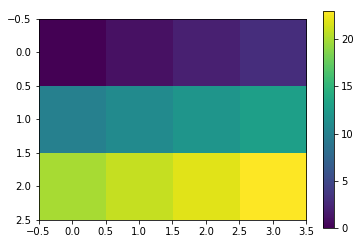

In [14]:
p0 = d[0,:,:]
p1 = d[1,:,:]
print(p0)
plt.imshow(p0)
plt.colorbar()

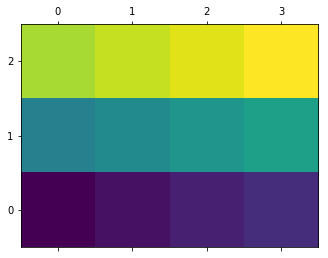

In [16]:
plt.matshow(p0,origin='lower')

Note that for a small 4x3 matrix this image has been artificially made smooth by interpolating in imshow(); however you can already see that the integer coordinates are at the center of a cell:  (0.0) is the center of the lower left cell. This is a little more obvious when you turn off interpolation:


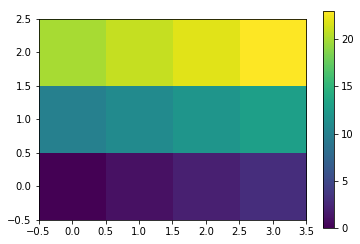

In [17]:
plt.imshow(p0,interpolation='none',origin='lower')
plt.colorbar()

if you want to print the array values on the terminal with 0 at the bottom left, use the np.flipup() function:

[[ 20.  21.  22.  23.]
 [ 10.  11.  12.  13.]
 [  0.   1.   2.   3.]]


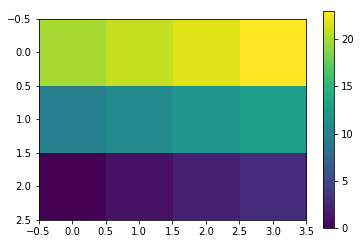

In [18]:
print(np.flipud(p0))
plt.imshow(np.flipud(p0),interpolation='none')
plt.colorbar()

In [20]:
import numpy.ma as ma

a = np.arange(4)
am = ma.masked_equal(a,2)
print(a.sum(),am.sum())
print(am.data,am.mask)

(6, 4)
(array([0, 1, 2, 3]), array([False, False,  True, False], dtype=bool))


### Some Real Data


In [21]:
# lets load the matplot lib color scales
#  and image module to readin images

import matplotlib.colors as colors
import matplotlib.image as mpimg

hdu = fits.open('../data/PKR_DASC_0558_20151220_044655.730.FITS')

In [22]:
print(len(hdu))
for HDU in hdu:
    print(HDU)

1


In [24]:
h = hdu[0].header
d = hdu[0].data
print(d.shape, d.min(), d.max(), d.mean(), np.median(d), d.std())
hdu.info()

((512L, 512L), 352, 16383, 457.2390251159668, 418.0, 273.82941736057472)
Filename: ../data/PKR_DASC_0558_20151220_044655.730.FITS
No.    Name         Type      Cards   Dimensions   Format
  0  PRIMARY     PrimaryHDU      39   (512, 512)   int16   


(512L, 512L)


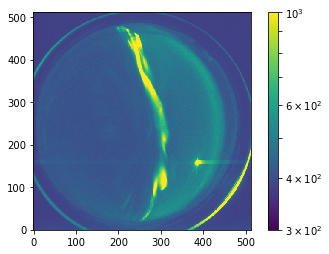

In [25]:
im = d
plt.imshow(im,origin=['Lower'], norm=colors.LogNorm(vmin=300,vmax=1000) )
plt.colorbar()
print(im.shape)

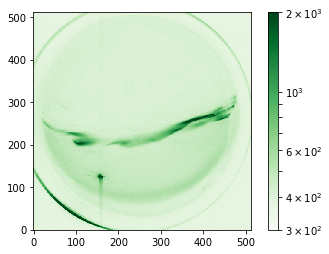

In [26]:
plt.imshow(np.rot90(im,k=1), origin=['Lower'], norm=colors.LogNorm(vmin=300,vmax=2000), cmap='Greens' )
plt.colorbar()

In [27]:
img = mpimg.imread('../data/20151220_081842_yknf_slr-08_full.jpg')
img.shape

(1280L, 1920L, 3L)

In [ ]:
# Plot the different RGB channels
fig, axes = plt.subplots(1, 4, figsize=(20,12))

axes[0].imshow(img[:, :, 0], cmap='Reds')
axes[1].imshow(img[:, :, 1], cmap='Greens') 
axes[2].imshow(img[:, :, 2], cmap='Blues') 
axes[3].imshow(img)

for a in axes:
    a.set_xticklabels([])
    a.set_yticklabels([])

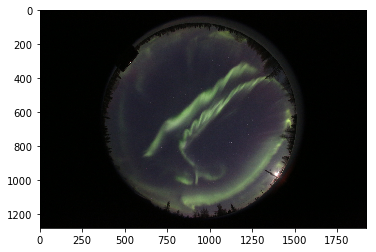

In [28]:
plt.imshow(img)

## 4. Contour Plots

([], <a list of 0 Text yticklabel objects>)

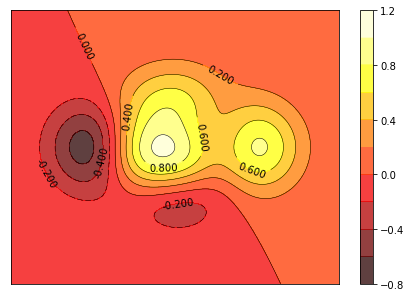

In [29]:
def f(x,y):
    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

n = 256
x = np.linspace(-3,3,n)
y = np.linspace(-3,3,n)
X,Y = np.meshgrid(x,y)

plt.axes([0.025,0.025,0.95,0.95])

plt.contourf(X, Y, f(X,Y), 10, alpha=.75, cmap=plt.cm.hot)
plt.colorbar()

C = plt.contour(X, Y, f(X,Y), 10, colors='black', linewidths=.5)
plt.clabel(C, inline=1, fontsize=10)
plt.xticks([])
plt.yticks([])


## 5. Matrix Manipulation



### Inner and Outer loop order of execution

Set up a (random) square matrix and vector. Multiply the matrix with a vector and measure the performance difference if you order the loops differently.

In [31]:
%%time 
n = 1000
m = n*10
np.random.seed(123)
a = np.random.normal(size=m*n).reshape(m,n)
x = np.random.normal(size=n)
print(x[0])
#
#a = np.arange(n*n).reshape(n,n)
#x = np.arange(n)

-0.584413867403
Wall time: 597 ms


In [32]:
%%timeit
b = np.matmul(a,x)

The slowest run took 31.96 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 7.22 ms per loop


In [33]:
print(a.shape,x.shape)

((10000L, 1000L), (1000L,))


In [34]:
%%timeit
b1 = np.zeros(m)
for i in range(m):
    for j in range(n):
        b1[i] = b1[i] + a[i,j]*x[j]

1 loop, best of 3: 7.89 s per loop


In [35]:
%%timeit
b2 = np.zeros(m)
for i in range(m):
    ai = a[i,:]
    b2[i] = b2[i] + np.inner(ai,x)

10 loops, best of 3: 30.9 ms per loop


In [36]:
%%timeit
b3 = np.zeros(m)
for j in range(n):
    for i in range(m):
        b3[i] = b3[i] + a[i,j]*x[j]

1 loop, best of 3: 8.14 s per loop


In [37]:
if n < 3:
    print('a',a,'\nx',x)
    print('b',b,'\nb1',b1,'\nb2',b2,'\nb3',b3)
else:
    print(n)

1000


### Transposing

In [38]:
%%timeit
b = a.transpose()
# note B is another view of A

The slowest run took 32.92 times longer than the fastest. This could mean that an intermediate result is being cached.
1000000 loops, best of 3: 257 ns per loop


In [39]:
%%timeit
c = np.zeros(n*m).reshape(n,m)

for j in range(n):
    for i in range(m):
        c[j,i] = a[i,j]

1 loop, best of 3: 3.75 s per loop


### Inversion

In [40]:
from numpy.linalg import inv


In [41]:
# Let's create a simple 2x2 matrix
n = 2
a1 = np.random.normal(size=n*n).reshape(n,n)

print(a1)

[[-3.09200693  0.49546445]
 [ 0.7476379   0.4326677 ]]


In [42]:
# and calculate the inverse 
ainv = inv(a1)

In [43]:
print(a1)
print(ainv)

np.matrix(a1) * np.matrix(ainv)

[[-3.09200693  0.49546445]
 [ 0.7476379   0.4326677 ]]
[[-0.2532828   0.2900439 ]
 [ 0.43766573  1.81005467]]


matrix([[  1.00000000e+00,   0.00000000e+00],
        [ -2.77555756e-17,   1.00000000e+00]])

In [44]:
i1=np.matmul(a1,ainv)

In [45]:
i0=np.eye(n)

In [46]:
print(np.allclose(i0,i1,atol=1e-10))
print(i1)

True
[[  1.00000000e+00   0.00000000e+00]
 [ -2.77555756e-17   1.00000000e+00]]
